In [9]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [10]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import threshold_mean
from skimage.transform import resize
import cv2

In [11]:
def show_data(images, prediction = False):
    if prediction:
      print("No tu bedziemy jeszcze obok pokazywac zgadl")
    else:
      plt.figure(figsize=(8, 4))
      for i in range(len(images.data)):
          plt.subplot(2, 5, i+1)
          plt.imshow(images.data[i])
          plt.xticks([])
          plt.yticks([])
          plt.draw()
      
      plt.figure(figsize=(8, 4))
      for i in range(len(images.test_data)):
          plt.subplot(2, 5, i+1)
          plt.imshow(images.test_data[i].reshape(128,128))
          plt.xticks([])
          plt.yticks([])
          plt.draw()
    plt.show()

In [30]:
class Data():
    def __init__(self):
        self.data = []
        self.train_data = []
        self.test_data = []
  
    def prepare_data(self):
        square = get_image('/content/gdrive/MyDrive/test/square/101.png')
        circle = get_image('/content/gdrive/MyDrive/test/circle/101.png')
        triangle = get_image('/content/gdrive/MyDrive/test/triangle/101.png')
        star = get_image('/content/gdrive/MyDrive/test/star/101.png')
        self.data = [square, circle, triangle, star]

    def prepare_train_data(self):
        new_data = self.data.copy()
        for image in new_data:
            image = resize(image, (128,128))

            thresh = threshold_mean(image)
            binary = image > thresh
            binary_int = 2*(binary*1)-1

            ready = np.reshape(binary_int, (128*128))
            self.train_data.append(ready)

    def prepare_test_data(self):
        for image in self.train_data:
            destroyed_image = image.copy()
            n = len(image)
            num_pixels = 0.5 * n
            for _ in range (int(num_pixels)):
                random = np.random.randint(0, n-1)
                destroyed_image[random] = -1*image[random]
              # corrupted[random] = 10 #w takiej opcji nie zadziała
            self.test_data.append(destroyed_image)


    


def get_image(path):
    image = cv2.cvtColor((cv2.imread(path)),cv2.COLOR_BGR2GRAY)
    return image


In [58]:
class Network():
    def __init__(self, images):
        self.data = images
        self.weights = []
        self.size = 0

    def initialize(self):
        self.size = len(self.data.train_data[0])
        self.num_categories = 4
        self.weights = np.zeros((self.size, self.size))

    
    def create_weights(self):
        tmp = np.zeros([self.size, self.size])
        for image in self.data.train_data:
            for i in range(self.size):
                for j in range(i, self.size):
                    if i == j:
                        tmp[i, j] = 0
                    else:
                        tmp[i,j] = image[i]*image[j]
                        tmp[j ,i] = tmp[i, j]

            self.W += tmp

    def update(self, image):
        for i in range(100):
            neuron = random.randint(0, self.size -1 )
            u = np.dot(w[neuron][:], image) - 0.5
            if u>0:
                image[neuron] = 1
            elif u<0:
                image[neuron] = -1
            
        return image


In [59]:
def main(): 
    images = Data()
    images.prepare_data()
    images.prepare_train_data()
    images.prepare_test_data()
    show_data(images)

    network = Network(images)
    network.initialize()
    network.create_weights()
    solution = [network.update(image) for image in images.test_data]

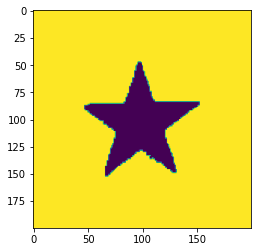

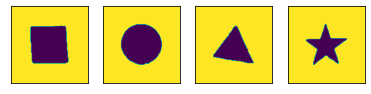

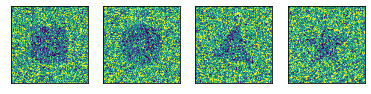

KeyboardInterrupt: ignored

In [60]:
main()